# 회귀
# ✔ 학생성적 예측 데이터

## 📌Attention

데이터 설명 : 학생성적 예측 (종속변수 :G3)
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/X_train.csv
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/y_train.csv
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/X_test.csv
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/y_test.csv
데이터 출처 :https://www.kaggle.com/datasets/ishandutta/student-performance-data-set (참고, 데이터 수정)

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [27]:
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/X_test.csv")
x_label = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/y_test.csv")

display(x_train.head())
display(y_train.head())

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1714,GP,F,18,U,GT3,T,4,3,other,...,no,4,3,3,1,1,3,0,14,13
1,1254,GP,F,17,U,GT3,T,4,3,health,...,yes,4,4,3,1,3,4,0,13,15
2,1639,GP,F,16,R,GT3,T,4,4,health,...,no,2,4,4,2,3,4,6,10,11
3,1118,GP,M,16,U,GT3,T,4,4,services,...,no,5,3,3,1,3,5,0,15,13
4,1499,GP,M,19,U,GT3,T,3,2,services,...,yes,4,5,4,1,1,4,0,5,0


,StudentID,G3
0,1714,14
1,1254,15
2,1639,11
3,1118,13
4,1499,0


In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentID   678 non-null    int64 
 1   school      678 non-null    object
 2   sex         678 non-null    object
 3   age         678 non-null    int64 
 4   address     678 non-null    object
 5   famsize     678 non-null    object
 6   Pstatus     678 non-null    object
 7   Medu        678 non-null    int64 
 8   Fedu        678 non-null    int64 
 9   Mjob        678 non-null    object
 10  Fjob        678 non-null    object
 11  reason      678 non-null    object
 12  guardian    678 non-null    object
 13  traveltime  678 non-null    int64 
 14  studytime   678 non-null    int64 
 15  failures    678 non-null    int64 
 16  schoolsup   678 non-null    object
 17  famsup      678 non-null    object
 18  paid        678 non-null    object
 19  activities  678 non-null    object
 20  nursery   

In [29]:
x_train.describe()

,StudentID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,678.000000,678.000000,678.000000,678.000000,678.00000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.00000,678.000000
mean,1516.181416,16.719764,2.607670,2.371681,1.50590,1.989676,0.261062,3.933628,3.233038,3.140118,1.480826,2.293510,3.522124,4.594395,11.20649,11.182891
std,303.029891,1.239881,1.134682,1.096750,0.73675,0.848082,0.664340,0.952346,1.042083,1.165537,0.895789,1.287705,1.431430,6.527236,2.90395,3.296146
min,1001.000000,15.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.00000,0.000000
25%,1253.250000,16.000000,2.000000,1.000000,1.00000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,9.00000,9.000000
50%,1508.000000,17.000000,3.000000,2.000000,1.00000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.00000,11.000000
75%,1780.750000,18.000000,4.000000,3.000000,2.00000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.00000,13.000000
max,2043.000000,22.000000,4.000000,4.000000,4.00000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.00000,19.000000


In [30]:
for i in list(x_train.select_dtypes(include='object').columns):
    print(i, x_train[i].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['T' 'A']
Mjob ['other' 'health' 'services' 'at_home' 'teacher']
Fjob ['other' 'teacher' 'services' 'at_home' 'health']
reason ['reputation' 'other' 'course' 'home']
guardian ['father' 'mother' 'other']
schoolsup ['no' 'yes']
famsup ['yes' 'no']
paid ['yes' 'no']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['yes' 'no']
romantic ['no' 'yes']


## 1. 전처리 없이 회귀

In [31]:
x_train = x_train.drop('StudentID', axis=1)
x_test_id = x_test['StudentID']
x_test = x_test.drop('StudentID', axis=1)

### 1) RandomForest

In [33]:
cols = x_train.select_dtypes(include='object').columns
x_train = pd.get_dummies(x_train, columns = cols)
x_test = pd.get_dummies(x_test, columns = cols)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train['G3'], test_size = 0.3, random_state = 2022)

In [34]:
rf= RandomForestRegressor(n_estimators =300, max_depth =5, min_samples_split =5, random_state=2022)
rf.fit(x_train,y_train)
y_predict = rf.predict(x_val)
print("mse =", mean_squared_error(y_val,y_predict))
print('mae =', mean_absolute_error(y_val,y_predict))
print("rmse =", mean_squared_error(y_val,y_predict)**0.5)
print("r2 = ", r2_score(y_val,y_predict))

mse = 1.7530316728159419
mae = 0.8268776111464946
rmse = 1.324021024310393
r2 =  0.8436727706247842


### 2) XGBRegressor

In [35]:
xg = XGBRegressor(n_estimators=300,max_depth =5, random_state=2022)
xg.fit(x_train,y_train)
y_predict = xg.predict(x_val)
print("mse =", mean_squared_error(y_val,y_predict))
print('mae =', mean_absolute_error(y_val,y_predict))
print("rmse =", mean_squared_error(y_val,y_predict)**0.5)
print("r2 = ", r2_score(y_val,y_predict))

mse = 2.0667821939966364
mae = 0.9241951119666006
rmse = 1.437630757182329
r2 =  0.8156939551522598


### 3) LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_val)
print("mse =", mean_squared_error(y_val,y_predict))
print('mae =', mean_absolute_error(y_val,y_predict))
print("rmse =", mean_squared_error(y_val,y_predict)**0.5)
print("r2 = ", r2_score(y_val,y_predict))

mse = 2.3151682498408297
mae = 0.9425000957414216
rmse = 1.5215676947940338
r2 =  0.7935440393648356


<AxesSubplot:>

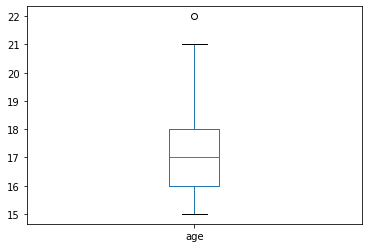

In [14]:
x_train['age'].plot(kind='box')

<AxesSubplot:>

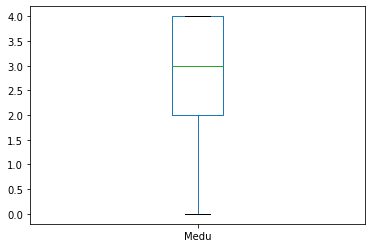

In [17]:
x_train['Medu'].plot(kind='box')

<AxesSubplot:>

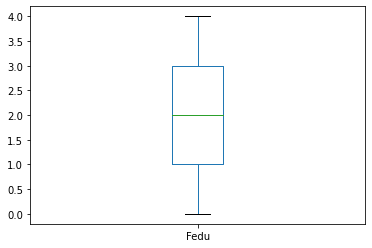

In [16]:
x_train['Fedu'].plot(kind='box')

<AxesSubplot:>

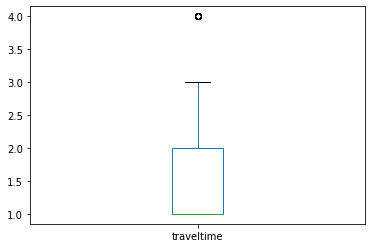

In [18]:
x_train['traveltime'].plot(kind='box')

<AxesSubplot:>

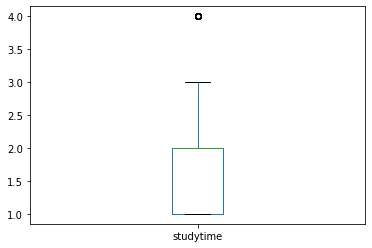

In [19]:
x_train['studytime'].plot(kind='box')

<AxesSubplot:>

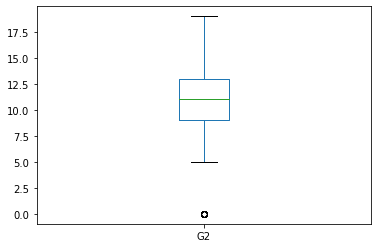

In [9]:
x_train['G2'].plot(kind='box')

<AxesSubplot:>

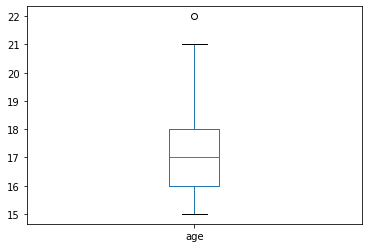

In [10]:
x_train['age'].plot(kind='box')